In [1]:
%load_ext autoreload
%autoreload 2
from util import util
import numpy as np

/opt/miniconda2/envs/py36h2o/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# train signals
%store -r signal_1_1_hor
%store -r signal_1_2_hor
%store -r signal_1_1_vert
%store -r signal_1_2_vert

%store -r signal_2_1_hor
%store -r signal_2_2_hor
%store -r signal_2_1_vert
%store -r signal_2_2_vert

%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_1_3_hor
%store -r signal_1_4_hor
%store -r signal_1_5_hor
%store -r signal_1_6_hor
%store -r signal_1_7_hor
%store -r signal_1_3_vert
%store -r signal_1_4_vert
%store -r signal_1_5_vert
%store -r signal_1_6_vert
%store -r signal_1_7_vert

%store -r signal_2_3_hor
%store -r signal_2_4_hor
%store -r signal_2_5_hor
%store -r signal_2_6_hor
%store -r signal_2_7_hor
%store -r signal_2_3_vert
%store -r signal_2_4_vert
%store -r signal_2_5_vert
%store -r signal_2_6_vert
%store -r signal_2_7_vert

%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train = [signal_1_1_hor, signal_1_2_hor, signal_2_1_hor, signal_2_2_hor, signal_3_1_hor, signal_3_2_hor]
vert_train = [signal_1_1_vert, signal_1_2_vert, signal_2_1_vert, signal_2_2_vert, signal_3_1_vert, signal_3_2_vert]

hor_test = [signal_1_3_hor, signal_1_4_hor, signal_1_5_hor, signal_1_6_hor, signal_1_7_hor,
            signal_2_3_hor, signal_2_4_hor, signal_2_5_hor, signal_2_6_hor, signal_2_7_hor,
            signal_3_3_hor]
vert_test = [signal_1_3_vert, signal_1_4_vert, signal_1_5_vert, signal_1_6_vert, signal_1_7_vert,
             signal_2_3_vert, signal_2_4_vert, signal_2_5_vert, signal_2_6_vert, signal_2_7_vert,
             signal_3_3_vert]

spectros_train_hor = [util.getSpectro(signal) for signal in hor_train]
spectros_train_vert = [util.getSpectro(signal) for signal in vert_train]

spectros_test_hor = [util.getSpectro(signal) for signal in hor_test]
spectros_test_vert = [util.getSpectro(signal) for signal in vert_test]

In [5]:
# parameters
layersizes = [500,200,50]
expName = 'b123_hor_vert'

testspecs = [
    ['1_3', 5730],
    ['1_4', 339],
    ['1_5', 1610],
    ['1_6', 1460],
    ['1_7', 7570],
    ['2_3', 7530],
    ['2_4', 1390],
    ['2_5', 3090],
    ['2_6', 1290],
    ['2_7', 580],
    ['3_3', 820]
]

### bepaal X en Y voor trainen

In [4]:
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)
    
print(np.shape(Y_train))

(7534, 2562)
(7534,)


## train modellen

Epoch 1/100
7534/7534 [==============================] - 9s 1ms/step - loss: 92908643.1781
Epoch 2/100
7534/7534 [==============================] - 9s 1ms/step - loss: 51233601.4346
Epoch 3/100
7534/7534 [==============================] - 8s 1ms/step - loss: 48325188.3897
Epoch 4/100
7534/7534 [==============================] - 9s 1ms/step - loss: 46034378.8022
Epoch 5/100
7534/7534 [==============================] - 8s 1ms/step - loss: 43776520.8728
Epoch 6/100
7534/7534 [==============================] - 8s 1ms/step - loss: 41374754.1959
Epoch 7/100
7534/7534 [==============================] - 8s 1ms/step - loss: 39399572.0319
Epoch 8/100
7534/7534 [==============================] - 8s 1ms/step - loss: 37837522.6769
Epoch 9/100
7534/7534 [==============================] - 9s 1ms/step - loss: 36388528.6605
Epoch 10/100
7534/7534 [==============================] - 8s 1ms/step - loss: 34920637.7905
Epoch 11/100
7534/7534 [==============================] - 8s 1ms/step - loss: 32884793.54

7534/7534 [==============================] - 5s 707us/step - loss: 1022005.1646
Epoch 91/100
7534/7534 [==============================] - 5s 703us/step - loss: 1018235.9705
Epoch 92/100
7534/7534 [==============================] - 5s 706us/step - loss: 970691.5814
Epoch 93/100
7534/7534 [==============================] - 5s 705us/step - loss: 957253.8774
Epoch 94/100
7534/7534 [==============================] - 5s 704us/step - loss: 958334.6688
Epoch 95/100
7534/7534 [==============================] - 5s 706us/step - loss: 940716.1553
Epoch 96/100
7534/7534 [==============================] - 5s 705us/step - loss: 976737.4352
Epoch 97/100
7534/7534 [==============================] - 5s 706us/step - loss: 914321.0354
Epoch 98/100
7534/7534 [==============================] - 5s 715us/step - loss: 886647.1967
Epoch 99/100
7534/7534 [==============================] - 5s 729us/step - loss: 973181.6377
Epoch 100/100
7534/7534 [==============================] - 5s 702us/step - loss: 890100.749

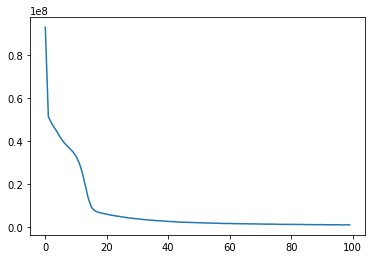

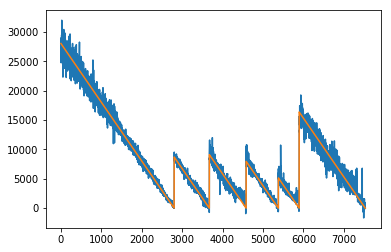

In [5]:
rulModel, history = util.trainModel(X_train, Y_train, layersizes, 100, expName)

Epoch 1/500
7534/7534 [==============================] - 6s 812us/step - loss: 91618586.3690
Epoch 2/500
7534/7534 [==============================] - 6s 811us/step - loss: 50839785.5057
Epoch 3/500
7534/7534 [==============================] - 6s 741us/step - loss: 47844691.2418
Epoch 4/500
7534/7534 [==============================] - 5s 718us/step - loss: 45256905.3109
Epoch 5/500
7534/7534 [==============================] - 5s 707us/step - loss: 42493929.1978
Epoch 6/500
7534/7534 [==============================] - 5s 710us/step - loss: 40168299.3332
Epoch 7/500
7534/7534 [==============================] - 5s 706us/step - loss: 38427109.0587
Epoch 8/500
7534/7534 [==============================] - 6s 736us/step - loss: 37093574.1434
Epoch 9/500
7534/7534 [==============================] - 5s 709us/step - loss: 35909243.2514
Epoch 10/500
7534/7534 [==============================] - 5s 718us/step - loss: 34333385.4760
Epoch 11/500
7534/7534 [==============================] - 5s 717us/st

7534/7534 [==============================] - 5s 698us/step - loss: 2207833.6363
Epoch 90/500
7534/7534 [==============================] - 5s 702us/step - loss: 2211259.1471
Epoch 91/500
7534/7534 [==============================] - 5s 697us/step - loss: 2153283.7771
Epoch 92/500
7534/7534 [==============================] - 5s 701us/step - loss: 2169791.2884
Epoch 93/500
7534/7534 [==============================] - 5s 697us/step - loss: 2142247.4387
Epoch 94/500
7534/7534 [==============================] - 5s 696us/step - loss: 2068410.6370
Epoch 95/500
7534/7534 [==============================] - 5s 695us/step - loss: 2025823.4760
Epoch 96/500
7534/7534 [==============================] - 5s 701us/step - loss: 2115012.6506
Epoch 97/500
7534/7534 [==============================] - 5s 697us/step - loss: 1991393.7413
Epoch 98/500
7534/7534 [==============================] - 5s 697us/step - loss: 1933046.4530
Epoch 99/500
7534/7534 [==============================] - 5s 699us/step - loss: 197

7534/7534 [==============================] - 8s 1ms/step - loss: 862849.7696
Epoch 178/500
7534/7534 [==============================] - 8s 1ms/step - loss: 878956.4960
Epoch 179/500
7534/7534 [==============================] - 8s 1ms/step - loss: 819400.3394
Epoch 180/500
7534/7534 [==============================] - 8s 1ms/step - loss: 807564.4964
Epoch 181/500
7534/7534 [==============================] - 8s 1ms/step - loss: 791755.4446
Epoch 182/500
7534/7534 [==============================] - 8s 1ms/step - loss: 816297.3037
Epoch 183/500
7534/7534 [==============================] - 8s 1ms/step - loss: 799995.5322
Epoch 184/500
7534/7534 [==============================] - 8s 1ms/step - loss: 801365.1861
Epoch 185/500
7534/7534 [==============================] - 8s 1ms/step - loss: 804765.1189
Epoch 186/500
7534/7534 [==============================] - 8s 1ms/step - loss: 768596.9419
Epoch 187/500
7534/7534 [==============================] - 8s 1ms/step - loss: 771507.3500
Epoch 188/500

7534/7534 [==============================] - 8s 1ms/step - loss: 484929.7942
Epoch 268/500
7534/7534 [==============================] - 8s 1ms/step - loss: 489211.3364
Epoch 269/500
7534/7534 [==============================] - 8s 1ms/step - loss: 515471.8597
Epoch 270/500
7534/7534 [==============================] - 8s 1ms/step - loss: 477860.2202
Epoch 271/500
7534/7534 [==============================] - 8s 1ms/step - loss: 508801.8918
Epoch 272/500
7534/7534 [==============================] - 8s 1ms/step - loss: 465412.6195
Epoch 273/500
7534/7534 [==============================] - 8s 1ms/step - loss: 463777.9258
Epoch 274/500
7534/7534 [==============================] - 8s 1ms/step - loss: 504433.4657
Epoch 275/500
7534/7534 [==============================] - 8s 1ms/step - loss: 471485.5969
Epoch 276/500
7534/7534 [==============================] - 8s 1ms/step - loss: 493798.2665
Epoch 277/500
7534/7534 [==============================] - 8s 1ms/step - loss: 459831.8578
Epoch 278/500

7534/7534 [==============================] - 5s 714us/step - loss: 357788.6877
Epoch 356/500
7534/7534 [==============================] - 6s 745us/step - loss: 334346.6225
Epoch 357/500
7534/7534 [==============================] - 5s 710us/step - loss: 349621.2670
Epoch 358/500
7534/7534 [==============================] - 5s 705us/step - loss: 329996.1853
Epoch 359/500
7534/7534 [==============================] - 5s 696us/step - loss: 323753.9050
Epoch 360/500
7534/7534 [==============================] - 5s 697us/step - loss: 368735.0656
Epoch 361/500
7534/7534 [==============================] - 5s 697us/step - loss: 336517.2676
Epoch 362/500
7534/7534 [==============================] - 5s 696us/step - loss: 313869.0593
Epoch 363/500
7534/7534 [==============================] - 5s 700us/step - loss: 313019.7557
Epoch 364/500
7534/7534 [==============================] - 5s 699us/step - loss: 327837.5512
Epoch 365/500
7534/7534 [==============================] - 5s 719us/step - loss: 345

7534/7534 [==============================] - 5s 700us/step - loss: 242083.8018
Epoch 444/500
7534/7534 [==============================] - 5s 702us/step - loss: 237030.2737
Epoch 445/500
7534/7534 [==============================] - 5s 698us/step - loss: 309799.5435
Epoch 446/500
7534/7534 [==============================] - 5s 713us/step - loss: 235126.0641
Epoch 447/500
7534/7534 [==============================] - 6s 787us/step - loss: 246710.4890
Epoch 448/500
7534/7534 [==============================] - 5s 706us/step - loss: 258223.3410
Epoch 449/500
7534/7534 [==============================] - 6s 749us/step - loss: 253881.1906
Epoch 450/500
7534/7534 [==============================] - 6s 839us/step - loss: 241717.4911
Epoch 451/500
7534/7534 [==============================] - 6s 846us/step - loss: 244860.9931
Epoch 452/500
7534/7534 [==============================] - 6s 802us/step - loss: 236461.8881
Epoch 453/500
7534/7534 [==============================] - 6s 798us/step - loss: 227

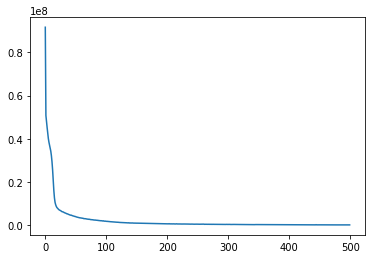

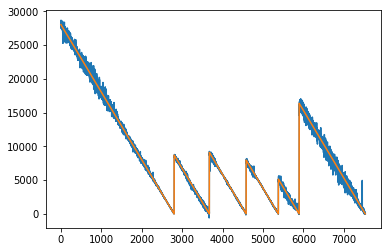

In [6]:
rulModel, history = util.trainModel(X_train, Y_train, layersizes, 500, expName)

## test modellen

##################
# Test: 1_3
##################
1802/1802 [==============================] - 1s 489us/step


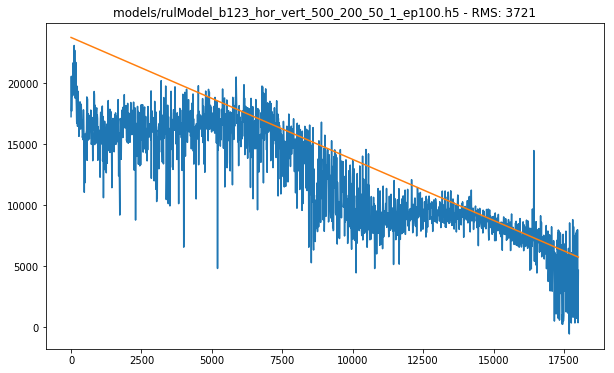

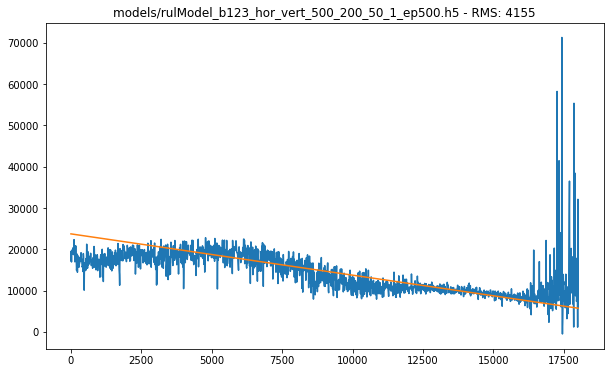

##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 704us/step


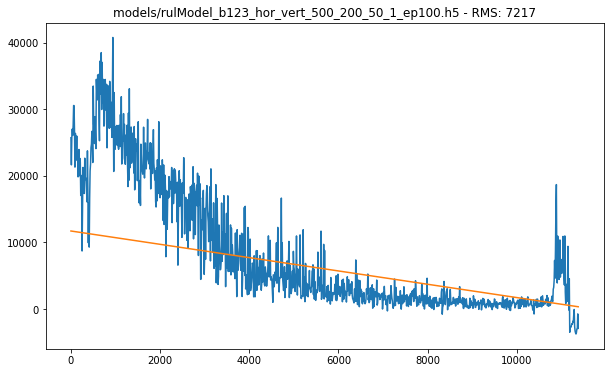

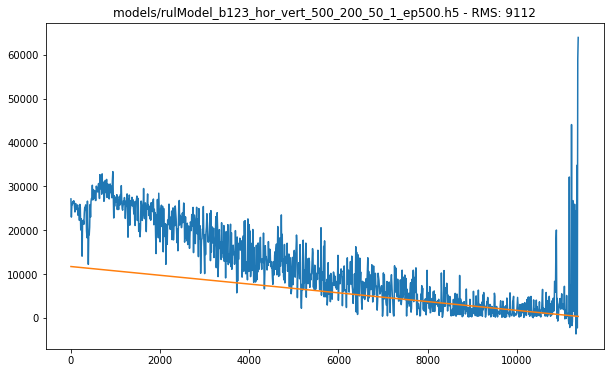

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 494us/step


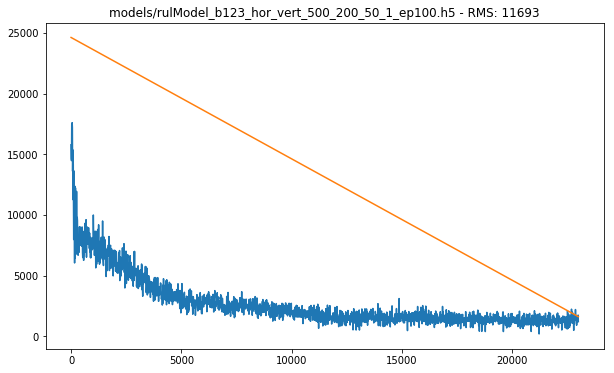

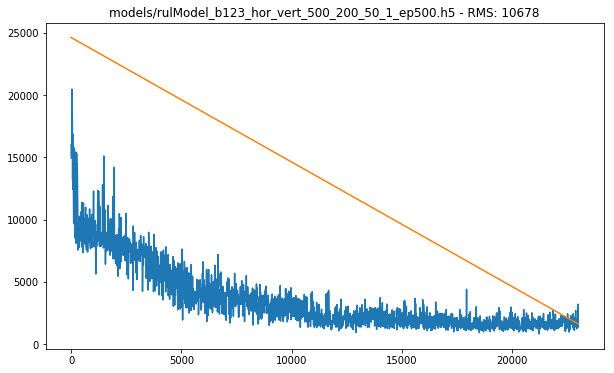

##################
# Test: 1_6
##################
2302/2302 [==============================] - 1s 485us/step


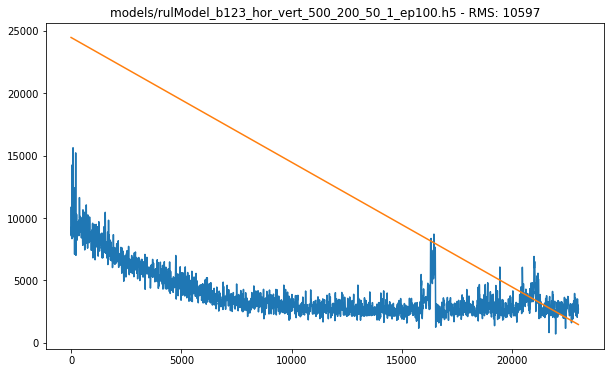

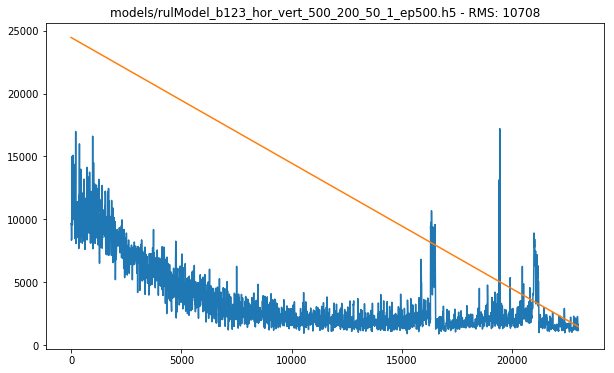

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 634us/step


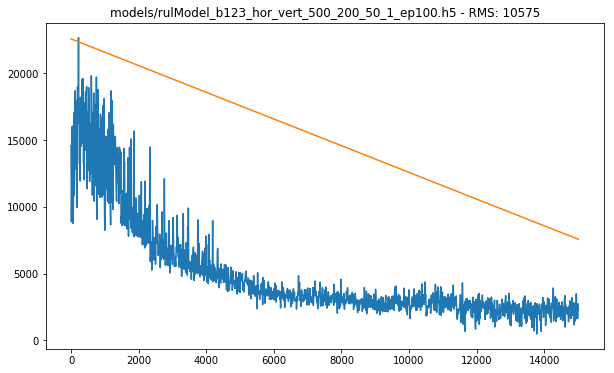

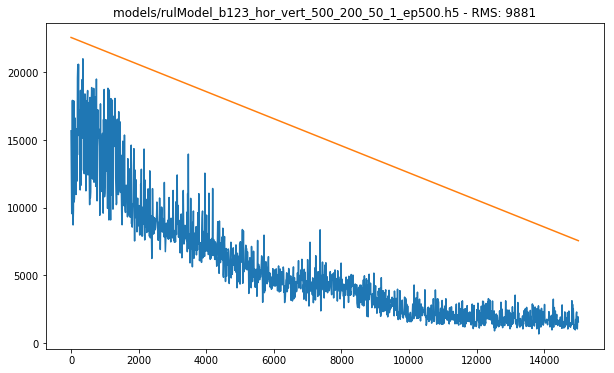

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 753us/step


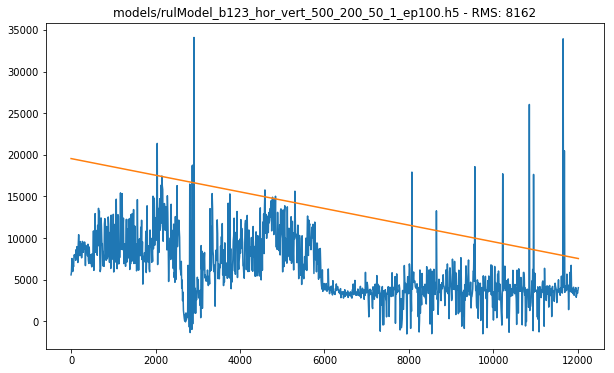

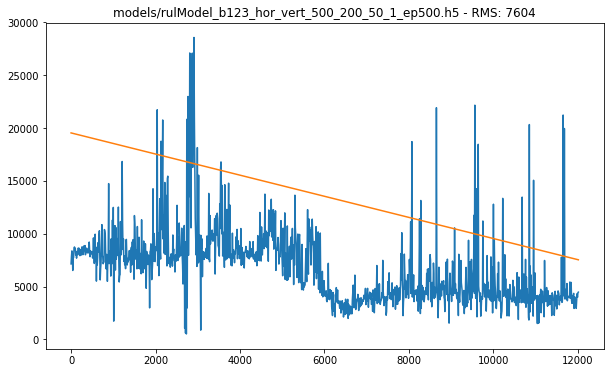

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 1ms/step


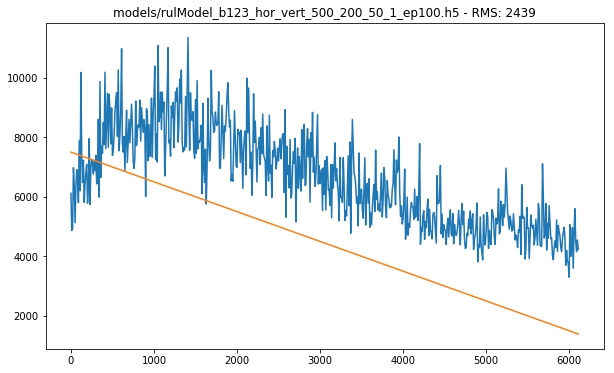

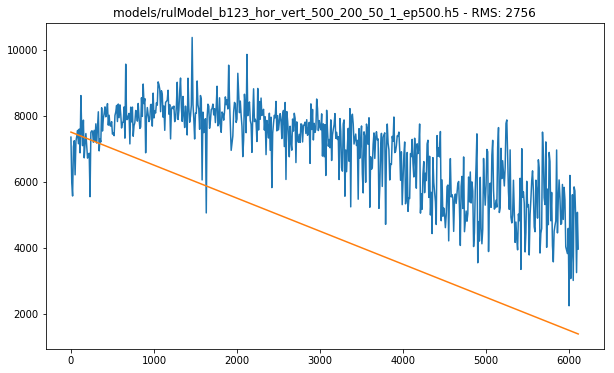

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 575us/step


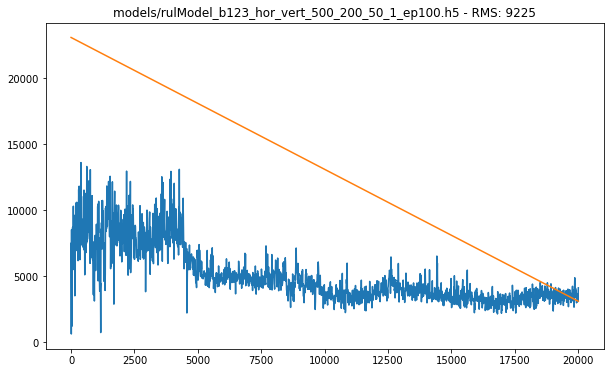

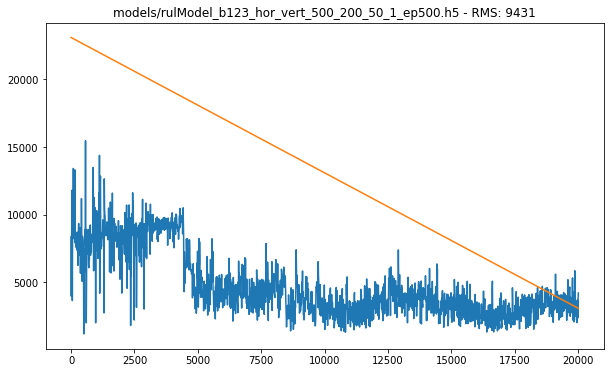

##################
# Test: 2_6
##################
572/572 [==============================] - 1s 2ms/step


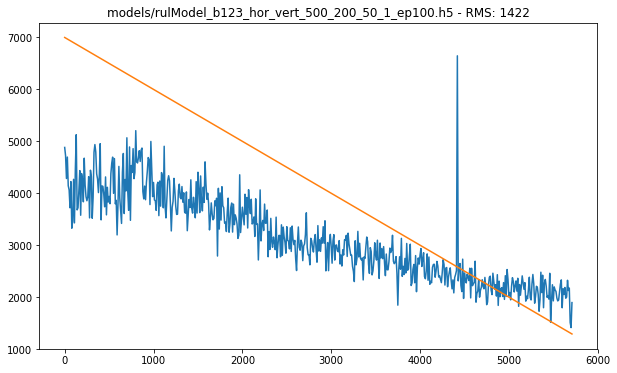

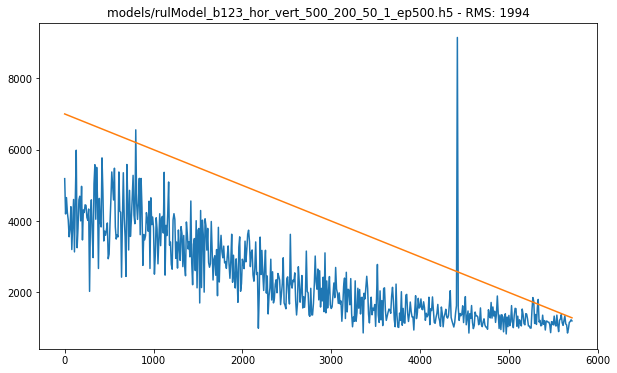

##################
# Test: 2_7
##################
172/172 [==============================] - 1s 5ms/step


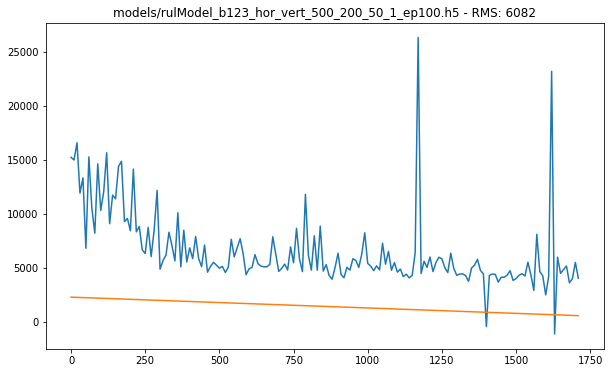

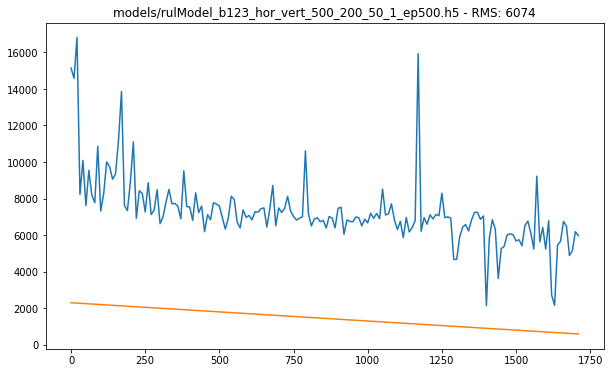

##################
# Test: 3_3
##################
352/352 [==============================] - 1s 3ms/step


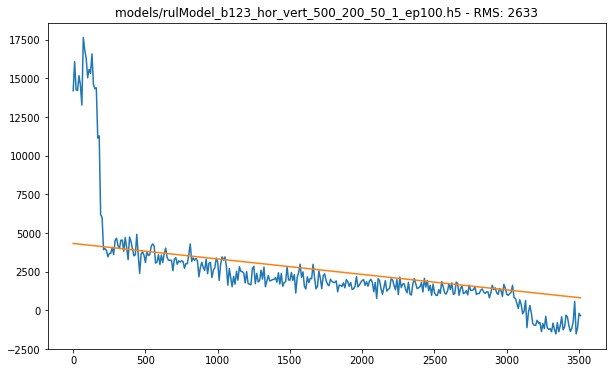

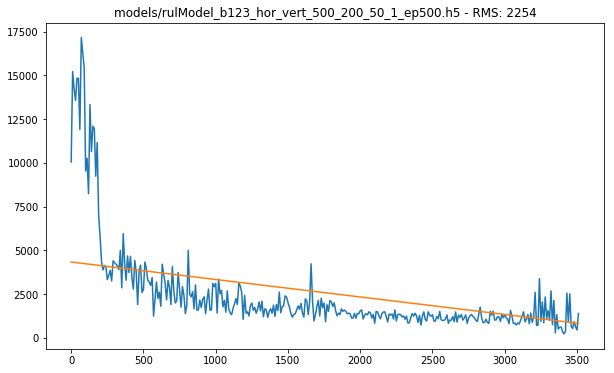

In [6]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, 100, expName), util.getModelName(layersizes, 500, expName)]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)